In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

RDKit WARNING: [16:24:37] Enabling RDKit 2019.09.3 jupyter extensions


In [67]:
moldir = "/home/nricke/work/klodaya/allfiles/catalystonly-molfiles-chargefix"
catalyst_mols = {}
molfile_list = os.listdir(moldir)
for molfile in molfile_list:
    mol = Chem.MolFromMolFile(os.path.join(moldir, molfile))
    
    if mol == None:
        print(molfile)
    else:
        catalyst_mols[molfile] = mol

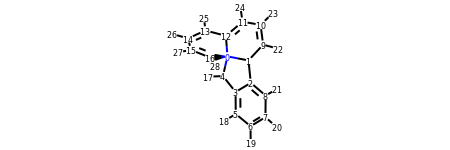

In [57]:
molfiles = ["sf85x0_optsp_c1m2.mol", "sf87x0_optsp_c1m2.mol", "sf70x0_optsp_c1m2.mol", "sf88x0_optsp_c1m2.mol", "sf86x0_optsp_c1m2.mol", "sf16x1_optsp_c1m2.mol", "sf9x0_optsp_a0m2.mol"]
picked_molfile = molfiles[6]
m = Chem.MolFromMolFile(os.path.join(moldir, picked_molfile), sanitize=False, removeHs=True)
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

In [58]:
smi = Chem.MolToSmiles(m)
m_smi = Chem.MolFromSmiles(smi)
m_smi

RDKit ERROR: [16:45:52] Explicit valence for atom # 16 N, 4, is greater than permitted


In [59]:
for atom in m.GetAtoms():
    print(atom.GetIdx(), atom.GetAtomicNum())

0 7
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
12 6
13 6
14 6
15 6
16 6
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1


In [60]:
n_atom = m.GetAtomWithIdx(0)

In [61]:
n_atom.GetFormalCharge()

0

In [62]:
n_atom.SetFormalCharge(1)

In [63]:
Chem.MolToMolFile(m, picked_molfile)

In [64]:
m_in = Chem.MolFromMolFile(picked_molfile)

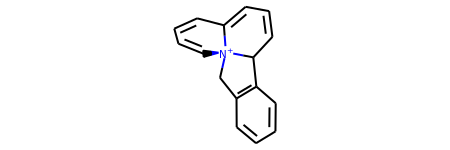

In [65]:
m_in